In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# Paths to datasets
train_dir = "./training_set"
test_dir = "./test_set"

In [ ]:

# Load images and labels from a directory
def load_images_from_directory(directory, label, target_size=(150, 150)):
    images = []
    labels = []
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        try:
            img = load_img(img_path, target_size=target_size)  # Resize image
            img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

In [5]:
# Load data for cats and dogs
cats_train_images, cats_train_labels = load_images_from_directory(
    os.path.join(train_dir, "cats"), label=0
)

Error loading image ./training_set\cats\_DS_Store: cannot identify image file <_io.BytesIO object at 0x0000023126F65170>


In [6]:
cats_train_images

array([[[[0.15294118, 0.17254902, 0.15686275],
         [0.16078432, 0.1764706 , 0.17254902],
         [0.16078432, 0.1764706 , 0.1882353 ],
         ...,
         [0.7254902 , 0.72156864, 0.6392157 ],
         [0.8117647 , 0.8       , 0.6784314 ],
         [0.7882353 , 0.7764706 , 0.6392157 ]],

        [[0.15686275, 0.1764706 , 0.16078432],
         [0.15686275, 0.17254902, 0.16862746],
         [0.15686275, 0.17254902, 0.18431373],
         ...,
         [0.7254902 , 0.72156864, 0.6431373 ],
         [0.78039217, 0.7647059 , 0.6509804 ],
         [0.78039217, 0.7607843 , 0.63529414]],

        [[0.14509805, 0.16470589, 0.14901961],
         [0.13333334, 0.14901961, 0.14509805],
         [0.12941177, 0.14509805, 0.15686275],
         ...,
         [0.7058824 , 0.69411767, 0.627451  ],
         [0.7647059 , 0.7411765 , 0.6392157 ],
         [0.8117647 , 0.78431374, 0.67058825]],

        ...,

        [[0.09411765, 0.08627451, 0.09019608],
         [0.07843138, 0.07058824, 0.07450981]

In [7]:

dogs_train_images, dogs_train_labels = load_images_from_directory(
    os.path.join(train_dir, "dogs"), label=1
)


Error loading image ./training_set\dogs\_DS_Store: cannot identify image file <_io.BytesIO object at 0x000002313D4925C0>


In [8]:

# Combine and split into training and validation sets
X = np.concatenate((cats_train_images, dogs_train_images), axis=0)
y = np.concatenate((cats_train_labels, dogs_train_labels), axis=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Load test data
cats_test_images, cats_test_labels = load_images_from_directory(
    os.path.join(test_dir, "cats"), label=0
)

Error loading image ./test_set\cats\_DS_Store: cannot identify image file <_io.BytesIO object at 0x00000231219898A0>


In [10]:
dogs_test_images, dogs_test_labels = load_images_from_directory(
    os.path.join(test_dir, "dogs"), label=1
)


Error loading image ./test_set\dogs\_DS_Store: cannot identify image file <_io.BytesIO object at 0x000002317FA77650>


In [11]:
X_test = np.concatenate((cats_test_images, dogs_test_images), axis=0)
y_test = np.concatenate((cats_test_labels, dogs_test_labels), axis=0)


In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 100s 477ms/step - accuracy: 0.5185 - loss: 0.7045 - val_accuracy: 0.6177 - val_loss: 0.6565
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 87s 433ms/step - accuracy: 0.6064 - loss: 0.6525 - val_accuracy: 0.6808 - val_loss: 0.5919
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 92s 459ms/step - accuracy: 0.6987 - loss: 0.5835 - val_accuracy: 0.6989 - val_loss: 0.5766
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 88s 439ms/step - accuracy: 0.7414 - loss: 0.5127 - val_accuracy: 0.7352 - val_loss: 0.5118
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 96s 475ms/step - accuracy: 0.7625 - loss: 0.4932 - val_accuracy: 0.7577 - val_loss: 0.5141
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 113s 563ms/step - accuracy: 0.7930 - loss: 0.4355 - val_accuracy: 0.7920 - val_loss: 0.4628
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 112s 556ms/step - accuracy: 0.8272 - loss: 0.3851 - val_accuracy: 0.8070 - val_loss: 0.4261
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 89s 444ms/step - accuracy: 0.8664 - loss

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.7798 - loss: 0.6169
Test Accuracy: 0.81


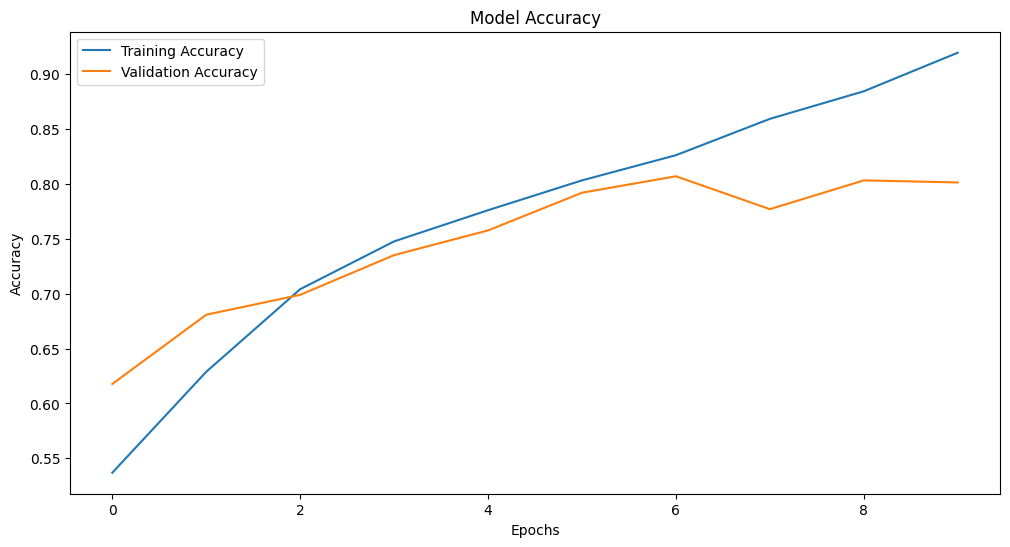

In [16]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

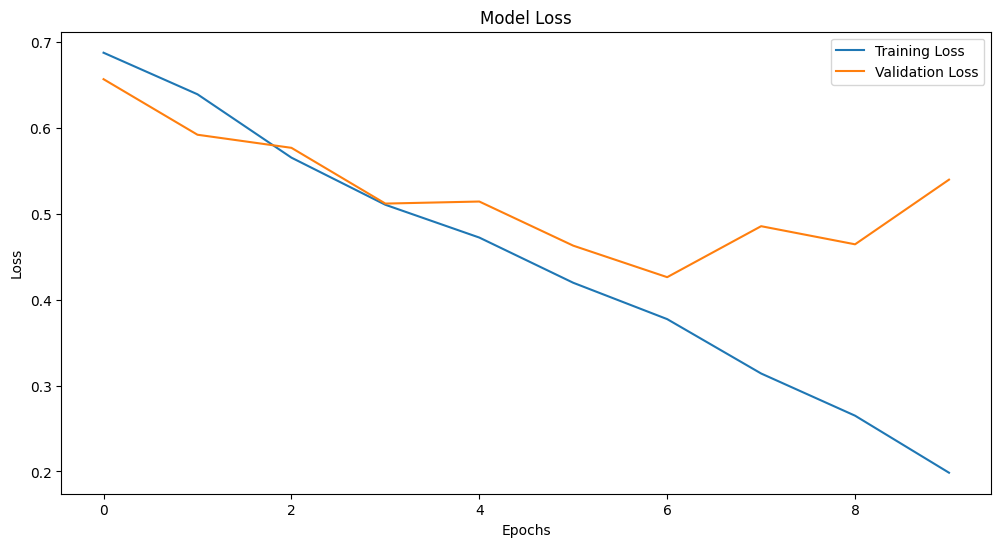

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Load data for cats and dogs
cats_train_images_2, cats_train_labels_2 = load_images_from_directory(
    os.path.join(train_dir, "cats"), label=0
)

In [19]:
dogs_train_images_2, dogs_train_labels_2 = load_images_from_directory(
    os.path.join(train_dir, "dogs"), label=1
)

In [20]:
# Combine and split into training and validation sets
X2 = np.concatenate((cats_train_images_2, dogs_train_images_2), axis=0)
y2 = np.concatenate((cats_train_labels_2, dogs_train_labels_2), axis=0)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [21]:
# Load test data
cats_test_images_2, cats_test_labels_2 = load_images_from_directory(
    os.path.join(test_dir, "cats"), label=0
)

In [22]:
dogs_test_images_2, dogs_test_labels_2 = load_images_from_directory(
    os.path.join(test_dir, "dogs"), label=1
)


In [23]:
X2_test = np.concatenate((cats_test_images_2, dogs_test_images_2), axis=0)
y2_test = np.concatenate((cats_test_labels_2, dogs_test_labels_2), axis=0)

In [24]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:

# Compile the model
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [29]:
# Train the model
history2 = model2.fit(
    X2_train, y2_train,
    epochs=20,
    batch_size=32,
    validation_data=(X2_val, y2_val)
)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 81s 402ms/step - accuracy: 0.9517 - loss: 0.1251 - val_accuracy: 0.8139 - val_loss: 0.6185
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 84s 420ms/step - accuracy: 0.9785 - loss: 0.0620 - val_accuracy: 0.7951 - val_loss: 0.5921
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 84s 419ms/step - accuracy: 0.9783 - loss: 0.0672 - val_accuracy: 0.8007 - val_loss: 0.9312
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 90s 450ms/step - accuracy: 0.9922 - loss: 0.0252 - val_accuracy: 0.7920 - val_loss: 1.0430
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 83s 412ms/step - accuracy: 0.9408 - loss: 0.1709 - val_accuracy: 0.8001 - val_loss: 0.8216
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 86s 427ms/step - accuracy: 0.9935 - loss: 0.0249 - val_accuracy: 0.8014 - val_loss: 1.0294
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 84s 416ms/step - accuracy: 0.9948 - loss: 0.0157 - val_accuracy: 0.7895 - val_loss: 1.0941
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 85s 422ms/step - accuracy: 0.9959 - loss: 0

In [32]:
# Evaluate the model
test_loss_2, test_acc_2 = model2.evaluate(X2_test, y2_test)
print(f"Test Accuracy: {test_acc_2:.2f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.8136 - loss: 1.6900
Test Accuracy: 0.81


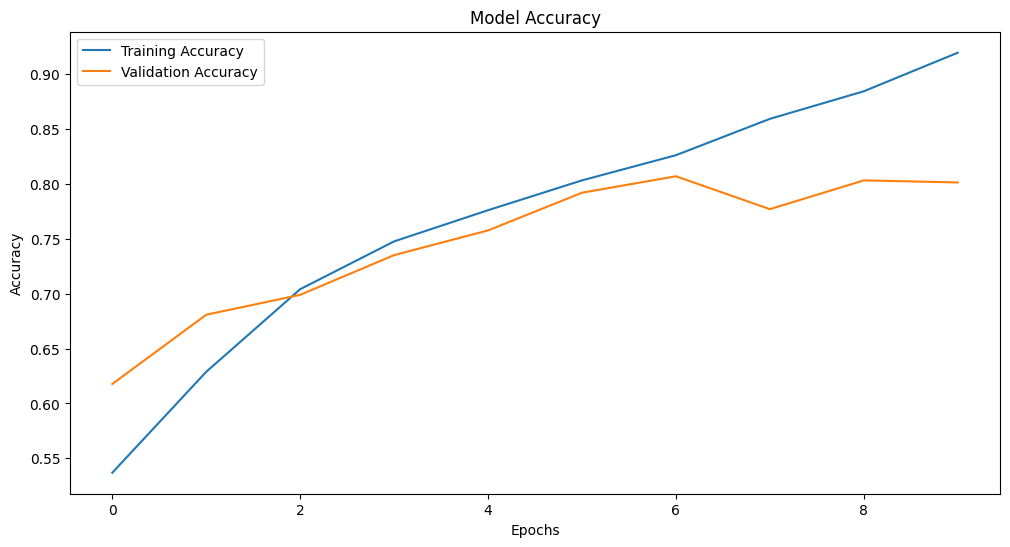

In [28]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### ImageDataGenerator

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
# Set up ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,    # Random shear transformations
    zoom_range=0.2,     # Random zoom
    horizontal_flip=True,  # Allow random horizontal flipping
    validation_split=0.2  # Reserve 20% of data for validation
)

In [35]:


# Load data using ImageDataGenerator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Training subset
)

Found 6404 images belonging to 2 classes.


In [36]:

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Validation subset
)


Found 1601 images belonging to 2 classes.


In [48]:
# Separate test data (no validation split here)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 2023 images belonging to 2 classes.


In [38]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [40]:

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20


C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 204s 994ms/step - accuracy: 0.5125 - loss: 0.7167 - val_accuracy: 0.5016 - val_loss: 0.7323
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 80s 393ms/step - accuracy: 0.5517 - loss: 0.6884 - val_accuracy: 0.5646 - val_loss: 0.6834
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 85s 417ms/step - accuracy: 0.5791 - loss: 0.6719 - val_accuracy: 0.6490 - val_loss: 0.6408
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 88s 432ms/step - accuracy: 0.6602 - loss: 0.6203 - val_accuracy: 0.6839 - val_loss: 0.6043
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 96s 474ms/step - accuracy: 0.7075 - loss: 0.5679 - val_accuracy: 0.7520 - val_loss: 0.5244
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 94s 466ms/step - accuracy: 0.7407 - loss: 0.5241 - val_accuracy: 0.7776 - val_loss: 0.4731
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 90s 444ms/step - accuracy: 0.7673 - loss: 0.4812 - val_accuracy: 0.7508 - val_loss: 0.4946
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 90s 444ms/step - accuracy: 0.7766 - loss: 0.4690 - va

In [49]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

 2/64 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8359 - loss: 0.3722 

C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 418ms/step - accuracy: 0.8630 - loss: 0.3562
Test Accuracy: 0.88
